# Data Description

The Testing Data consists of two files Test and Sample in which the Test file consists of all the Input Features and the sample File consists of the Target Variable.

# Importing Dataset

In [131]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Importing Training Dataset
df=pd.read_excel('Final_Test.xlsx')
hf=pd.read_excel('Sample_submission.xlsx')
#Visualizing first 5 rows of Test dataset
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [133]:
#Visualizing first 5 rows of Sample dataset
hf.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [134]:
#Checking columns in dataframe
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [135]:
#CHecking shape of dataframe
df.shape

(1987, 6)

Initially, we have 1987 rows and 6 columns in the test dataset.

# Checking Null Values & Treating Them


In [136]:
#Checking Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We can see that we have more than 50% missing data in the 'Rating' column so we drop the column. 'Miscellaneous_info' also has around 44% missing column which is neither a continuous data nor a nominal data and also shows not much importance to our dataset hence we drop this column as well. We will impute the 'Place' column.

In [137]:
#Droping the Rating & Miscellaneous info from the dataset
df.drop(['Rating','Miscellaneous_Info'],axis=1,inplace=True)

In [138]:
#Filling the place column using simle Imputer
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))

df

,Qualification,Experience,Place,Profile
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist
5,"BDS, MDS",14 years experience,"Velachery, Chennai",Dentist
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,"Frazer Town, Bangalore",ENT Specialist
7,"BDS, MDS - Pedodontics",9 years experience,"Attapur, Hyderabad",Dentist
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,"Banashankari, Bangalore",Ayurveda
9,BHMS,44 years experience,"Mayur Vihar Ph-I, Delhi",Homeopath


All the modifications that we have made can be seen in the above information i.e. 2 rows have been dropped and place column have been replaced with it's null values. Now, we are left with 5961 rows and only 5 columns in the dataset.

In [139]:
#Verifying null values again
df.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
dtype: int64

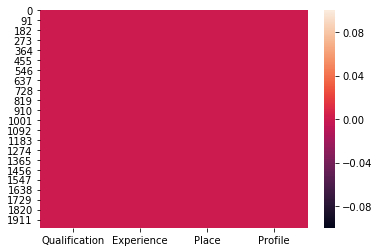

In [140]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

As we cannot see any null values in our data. Hence, we proceed forward with Visualizing the data.

# Encoding of DataFrame


In [141]:
#Checking datatypes of each column
df.dtypes

Qualification    object
Experience       object
Place            object
Profile          object
dtype: object

All the input features of our dataset are of 'object' datatype and only the target variable has integer datatype. We will encode our data to transform all string values int0 float values to do the further processing.

In [142]:
#Encoding data using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [143]:
#COnverting all string values into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [144]:
df

,Qualification,Experience,Place,Profile
0,241.0,28.0,142.0,4.0
1,340.0,24.0,580.0,3.0
2,258.0,34.0,212.0,2.0
3,6.0,0.0,374.0,0.0
4,79.0,7.0,231.0,1.0
5,78.0,5.0,554.0,1.0
6,340.0,15.0,134.0,3.0
7,99.0,56.0,31.0,1.0
8,542.0,2.0,51.0,0.0
9,128.0,38.0,323.0,5.0


We can see all our object datatype values have been converted into float values.

# Joining Two DataFrames

In [145]:
af=pd.concat([df,hf],axis=1)
af

,Qualification,Experience,Place,Profile,Fees
0,241.0,28.0,142.0,4.0,1747
1,340.0,24.0,580.0,3.0,1725
2,258.0,34.0,212.0,2.0,2194
3,6.0,0.0,374.0,0.0,2193
4,79.0,7.0,231.0,1.0,2091
5,78.0,5.0,554.0,1.0,1431
6,340.0,15.0,134.0,3.0,2111
7,99.0,56.0,31.0,1.0,1584
8,542.0,2.0,51.0,0.0,1829
9,128.0,38.0,323.0,5.0,1970


We can now see our target variable in the DataFrame. Hence, we can now Visualize the data.

# Data Visualization

In [146]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

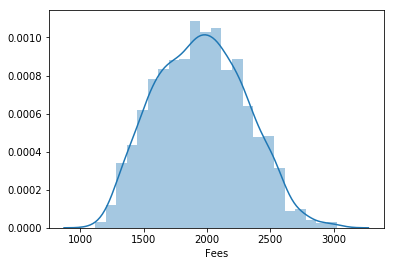

In [147]:
sns.distplot(af['Fees'],kde=True)

The fees column has values scattered between the range 1000 to 3000 which is very high.

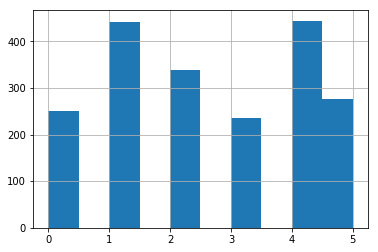

In [148]:
#Univariate Analysis
af['Profile'].hist(grid=True)
plt.show()

The doctor's belong to various profiles but most of them are to profile 1 & 4.

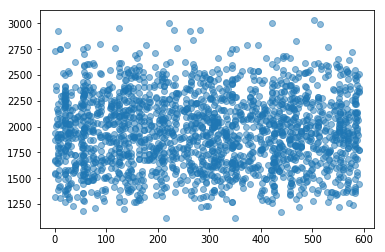

In [149]:
#Bivariate Analysis
plt.scatter(af['Place'],af["Fees"],alpha=0.5)

We do not see any any proper relation between Place and Fees of a doctor. The values are widely scattered.

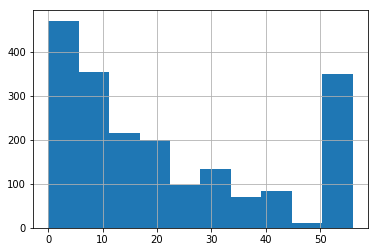

In [150]:
#Univariate Analysis
af['Experience'].hist(grid=True)
plt.show()

The Work Experience of Doctors within the dataset lies between 0 and 60. But most of the doctors have experience between 0 to 10 years.

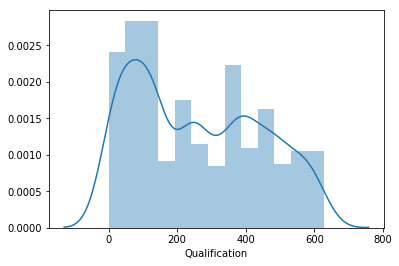

In [151]:
sns.distplot(af['Qualification'],kde=True)

The Qualification values of the Doctors are between 0 to 630. This means that the Doctors belong from various Qualification backgrounds.

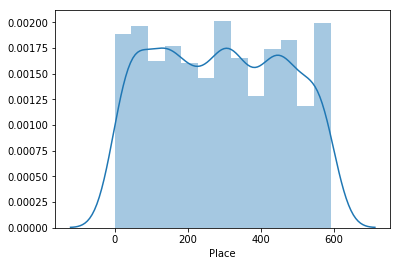

In [152]:
sns.distplot(af['Place'],kde=True)

The place values are between 0 and 590 and the values are equally distributed which means the doctor's have been staying at various different places

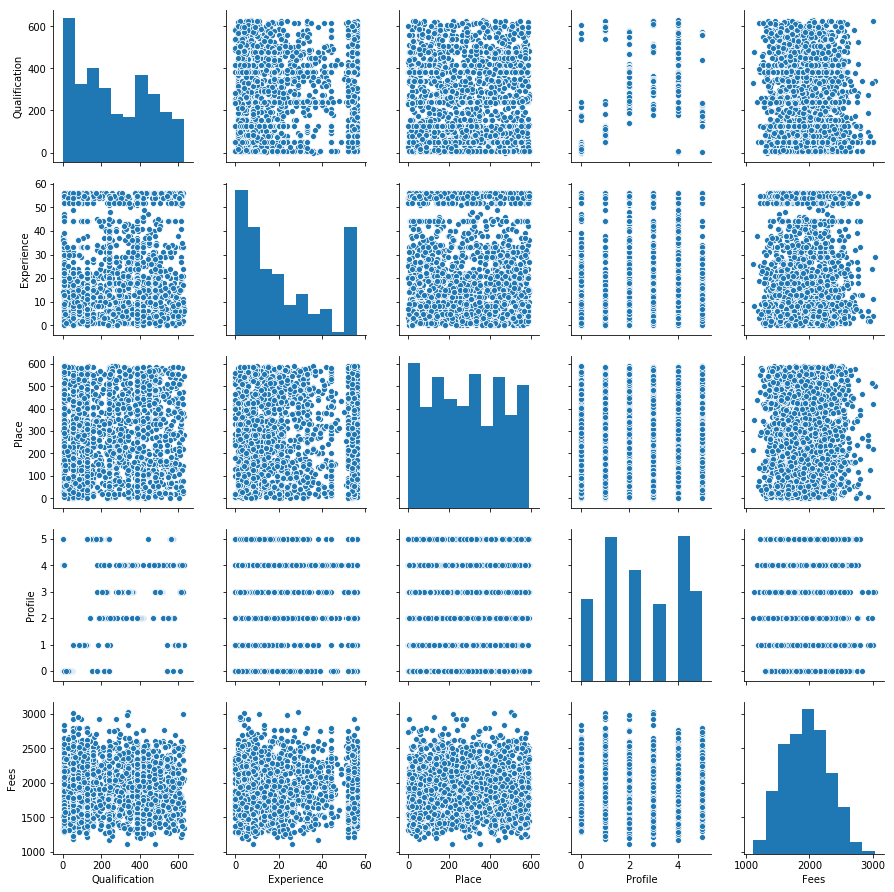

In [153]:
sns.pairplot(af)

We cannot see any proper correlation between any Variables within the dataset. Hence we will move forward and try to understand data better.

# Describe Data

In [154]:
#Describing final columns present in dataset
af.columns

Index(['Qualification', 'Experience', 'Place', 'Profile', 'Fees'], dtype='object')

In [155]:
#Defining Shape
af.shape

(1987, 5)

In [156]:
#Getting data information
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification    1987 non-null float64
Experience       1987 non-null float64
Place            1987 non-null float64
Profile          1987 non-null float64
Fees             1987 non-null int64
dtypes: float64(4), int64(1)
memory usage: 77.7 KB


As we have no Null values and all our values are either of int or float values. Hence we will describe the data.

In [157]:
#Describing mean, median, min, max values of data
af.describe()

,Qualification,Experience,Place,Profile,Fees
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,21.884248,288.894313,2.508807,1952.094112
std,185.961177,18.772896,174.094298,1.654223,351.198610
min,0.000000,0.000000,0.000000,0.000000,1116.000000
25%,93.000000,6.000000,137.000000,1.000000,1681.500000
50%,241.000000,15.000000,289.000000,2.000000,1948.000000
75%,417.000000,35.000000,439.000000,4.000000,2207.000000
max,629.000000,56.000000,591.000000,5.000000,3031.000000


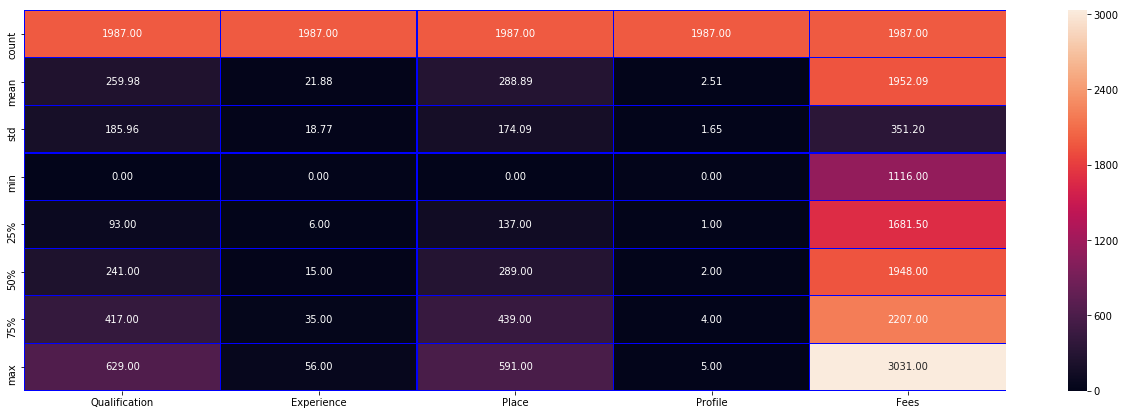

In [158]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(af.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observations:

The standard deviation of data is huge which says that the values within each columns of dataset are largely scattered.

Looking at the min and max values of our dataset, we don't see a possibility of having outliers.

The Values in the fees column are high which is around 3000.

# Correlation of columns with the Target Variable

In [159]:
#Finding correlation
af.corr()

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.018786,0.022150,0.372002,-0.032849
Experience,0.018786,1.000000,0.003424,0.017496,-0.020609
Place,0.022150,0.003424,1.000000,-0.002778,0.002219
Profile,0.372002,0.017496,-0.002778,1.000000,-0.024185
Fees,-0.032849,-0.020609,0.002219,-0.024185,1.000000


We observe both positive and negative correlation in our dataset.

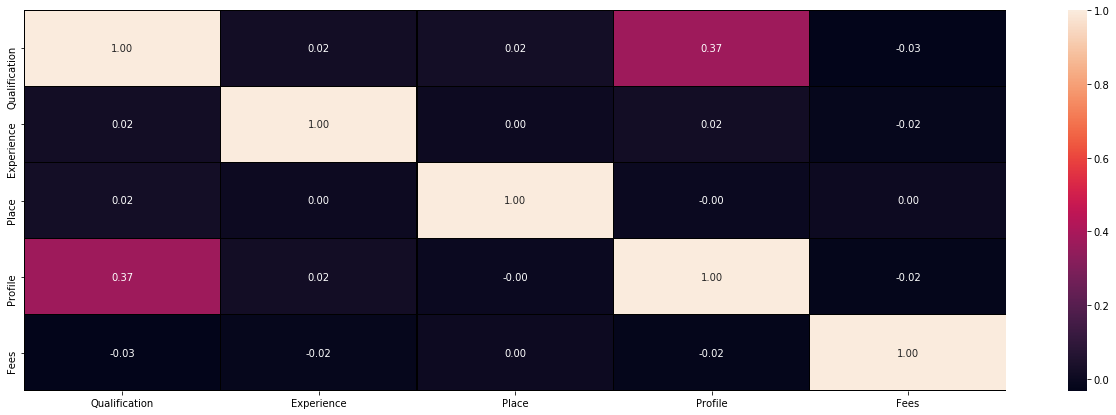

In [160]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(af.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
We cannot see positive correlation of any input variable with the target variable.

Most input features are negatively correlated with the target variable.

We do not observe any good correlation between our data.



In [161]:
#Sorting correlation in order with the Target Variable
corr_matrix=af.corr()
corr_matrix['Fees'].sort_values(ascending=False)

Fees             1.000000
Place            0.002219
Experience      -0.020609
Profile         -0.024185
Qualification   -0.032849
Name: Fees, dtype: float64

Place shows a constant correlation. 

Experience, Profile & Qualification show Negative Correlation.

# Checking Skewness

In [162]:
#Checking Skewness
af.skew()

Qualification    0.280822
Experience       0.687595
Place            0.046487
Profile          0.028926
Fees             0.144892
dtype: float64

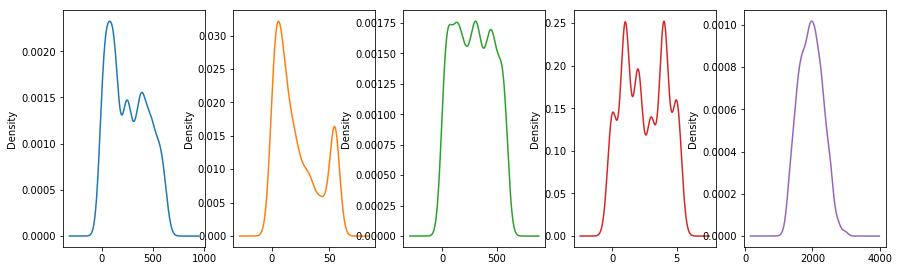

In [163]:
#Visualizing skewness on density graph
#Example of multi variate analysis
af.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

As all our input features had object datatype so we can hardly see any skewness in data. 

# Check Outliers

In [164]:
#Checking datatpe of each column
af.dtypes

Qualification    float64
Experience       float64
Place            float64
Profile          float64
Fees               int64
dtype: object

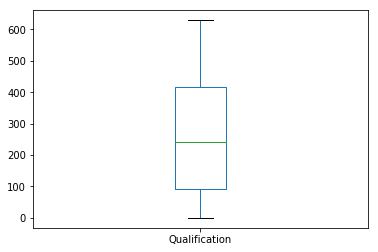

In [165]:
af['Qualification'].plot.box()

No Outliers

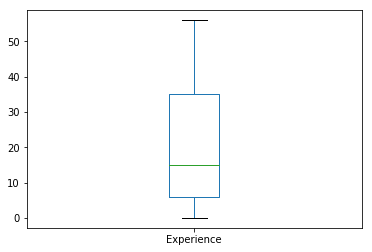

In [166]:
af['Experience'].plot.box()

We cannot see any outliers in the Experience column.

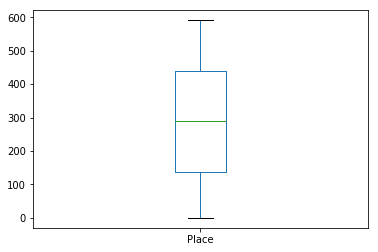

In [167]:
af['Place'].plot.box()

No outliers in Place column either.

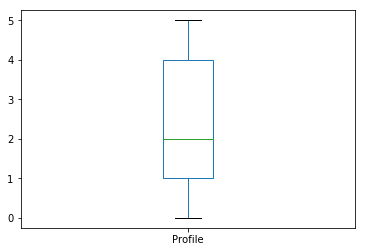

In [168]:
af['Profile'].plot.box()

No Outliers present.

The target variable also does not have any outliers.

# Separating the Columns into x & y

In [169]:
#Creating x & y columns 
x=af.drop('Fees',axis=1)
y=af['Fees']

Separating the columns into x & y as input featues and target variable respectively.

# Scaling Data using Min Max Scaler


In [170]:
#Importing libraries for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [171]:
#define min max scaler
mms=MinMaxScaler()
# transform data
ab=mms.fit_transform(af)
print(ab)

[[0.38314785 0.5        0.24027073 0.8        0.32950392]
 [0.54054054 0.42857143 0.98138748 0.6        0.31801567]
 [0.41017488 0.60714286 0.35871404 0.4        0.56292428]
 ...
 [0.75357711 1.         0.71742809 0.8        0.49451697]
 [0.08108108 0.05357143 0.04399323 0.2        0.74412533]
 [0.61049285 0.98214286 0.66666667 0.4        0.26997389]]


Hence, the data is Scaled.

# Loading the Best Saved Model

In [172]:
#Loading model
import pickle
fitted_model=pickle.load(open('Doctor.pkl','rb'))

In [173]:
fitted_model

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

# Predicting The Test File using the Pre Saved Model

In [175]:
#Prediction over test data
predictions=fitted_model.predict(df)

In [176]:
predictions

array([301.86338902, 354.519978  , 337.30735777, ..., 288.87275593,
       302.51313787, 368.4391329 ])